# Image Pre-processing

## Libraries

In [1]:
from PIL import Image, ImageEnhance
from pathlib import Path
import matplotlib.pyplot as plt
import uuid
import random
import os

## Transformation Functions

In [2]:
def sharpen(img, factor):
    enhancer_sharpness = ImageEnhance.Sharpness(img)
    return enhancer_sharpness.enhance(factor)

def contrast(img, factor):
    enhancer_contrast = ImageEnhance.Contrast(img)
    return enhancer_contrast.enhance(factor)

def color(img, factor):
    enhancer_color = ImageEnhance.Color(img)
    return enhancer_color.enhance(factor)

def rotate(img, degrees):
    return img.rotate(degrees)

def save(img, path):
    return img.save(path, "PNG")

## Display Functions

In [3]:
def plotImages(pathList, number):
    pp = list(pathList)
    plt.figure(figsize=(15,15))
    for i in range(number):
        plt.subplot(5,5,i+1)
        im = Image.open( pp[i] )
        plt.imshow(im)
        plt.xticks([])
        plt.yticks([])
    plt.show()

## Import images from S3

Replace this with the input S3 bucket:

In [4]:
!aws s3 cp --recursive s3://input-new-images ./images/ > /dev/null

## Define some values

Locations:

In [5]:
inputBasePath = './images/'
outputBasePath = './output/'
folders = ['minions', 'notminions']

Transformations:

In [6]:
rotations = [0,90,180,270]
randContrastMin, randContrastMax = (0.8, 1.2)
randSharpenMin, randSharpenMax  = (0.8, 1.2)
randColorMin, randColorMax    = (0.8, 1.2)
multiplier = 3

## Plot Images Before Transformation

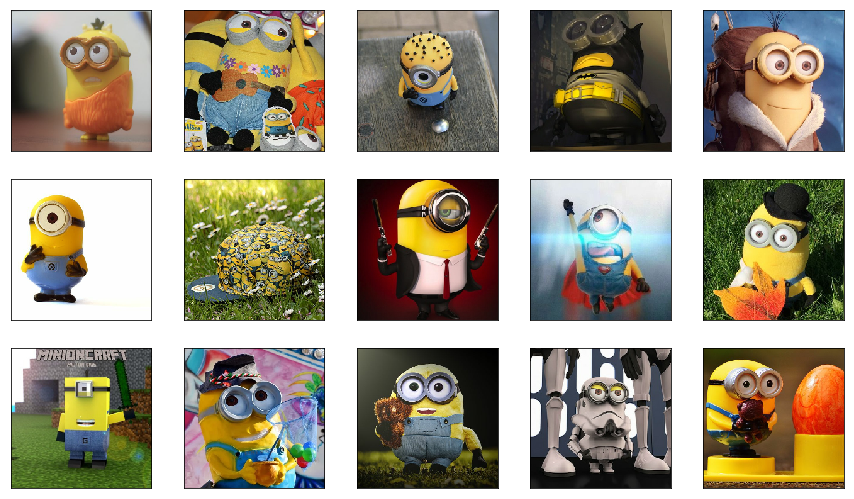

In [7]:
dp = Path(inputBasePath + 'minions' + '/').glob('*.png')
plotImages(dp, 15)

# Transform

Generate Images

In [8]:
for f in folders:
    plist = Path(inputBasePath + f + '/').glob('*.png')

    outpath = outputBasePath + f + '/' 
    if not os.path.exists(outpath):
        os.makedirs(outpath)
    
    for path in plist:
        i = Image.open( path )

        for r in rotations:
            
            for m in range(multiplier):
                
                randContrast = random.uniform(randContrastMin, randContrastMax)
                randSharpen = random.uniform(randSharpenMin, randSharpenMax)
                randColor = random.uniform(randColorMin, randColorMax)
                
                i = rotate(i, r)
                i = contrast(i, randContrast)
                i = sharpen(i, randSharpen)
                i = color(i, randColor)
                
                save(i, outpath + str(uuid.uuid4()) + '.png') 
                print('.', end='')

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

List all images from all classes:

In [9]:
allImages = []
for f in folders:
    for p in Path(outputBasePath + f + '/').glob('*.png'):
        allImages.append(str(p))

Shuffle classes together:

In [10]:
random.shuffle(allImages)

Create split dataset:

In [11]:
valLen = int(len(allImages)/4)
trainLen = len(allImages) - valLen
trainImg = allImages[:trainLen]
valImg  = allImages[1-valLen-1:]

In [12]:
print(trainLen, valLen)

900 300


## Write LST files

In [14]:
f = open("./output/train_lst.lst", "w+")
x = 0
for i in trainImg:
    x = x + 1
    if 'notminions' in i:
        f.write("%i\t0\t%s\n" % (x, i))
    else:
        f.write("%i\t1\t%s\n" % (x, i))
f.close()

In [15]:
f = open("./output/validation_lst.lst", "w+")
x = 0
for i in valImg:
    x = x + 1
    if 'notminions' in i:
        f.write("%i\t0\t%s\n" % (x, i))
    else:
        f.write("%i\t1\t%s\n" % (x, i))
f.close()

## Write data back to S3:

Replace this with the output S3 bucket:

In [16]:
!aws s3 cp --recursive ./output/ s3://output-new-images/ > /dev/null

## Plot Images After Transformation

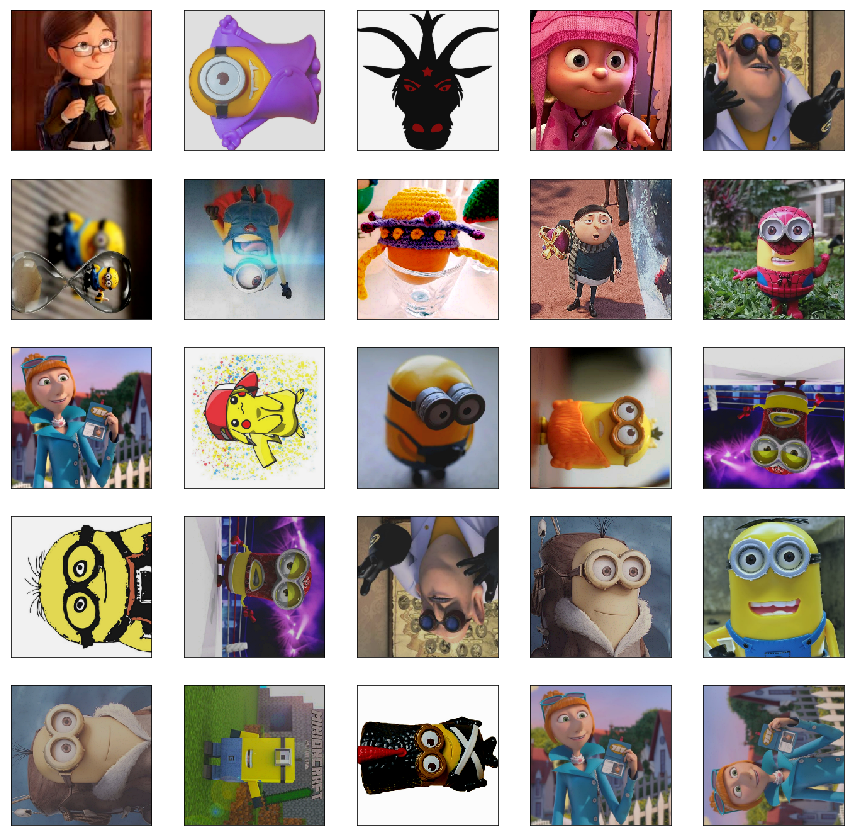

In [17]:
plotImages(allImages, 25)